In [18]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from sklearn.datasets import make_blobs
pd.options.display.max_columns = 70
sns.set_style("whitegrid")
% matplotlib inline

In [7]:
% cat ./ml-100k/README

SUMMARY & USAGE LICENSE

MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.
 
This data set consists of:
	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
	* Each user has rated at least 20 movies. 
        * Simple demographic info for the users (age, gender, occupation, zip)

The data was collected through the MovieLens web site
(movielens.umn.edu) during the seven-month period from September 19th, 
1997 through April 22nd, 1998. This data has been cleaned up - users
who had less than 20 ratings or did not have complete demographic
information were removed from this data set. Detailed descriptions of
the data file can be found at the end of this file.

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under th

In [12]:
u_data_df = pd.read_csv("ml-100k/u.data", delimiter='\t', header=None)
u_data_df.columns = ["user_id", "movie_id", "rating", "timestamp"]
u_data_df.head(1)

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949


In [13]:
np.unique(u_data_df["movie_id"])

array([   1,    2,    3, ..., 1680, 1681, 1682])

In [4]:
u_info_df = pd.read_csv("ml-100k/u.info", delimiter='\t', header=None)
u_info_df 

,0
0,943 users
1,1682 items
2,100000 ratings


In [14]:
update_columns_set = [
    "movie_id","movie_title","release_date","video_release_date",
    "IMDb_URL","unknown","Action","Adventure","Animation",
    "Children's","Comedy","Crime","Documentary","Drama","Fantasy",
    "Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi",
    "Thriller","War","Western"
]
# len(update_columns_set)
u_item_df = pd.read_csv("ml-100k/u.item", delimiter='|', header=None, encoding="ISO-8859-1")
u_item_df.columns = update_columns_set
u_item_df.head(1)

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
len(u_item_df.columns)

24

In [41]:
# 特定のカラムがNaNで無いものを調べる
u_item_df[u_item_df["video_release_date"].notnull()]

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western


In [43]:
% cat ml-100k/u.genre

unknown|0
Action|1
Adventure|2
Animation|3
Children's|4
Comedy|5
Crime|6
Documentary|7
Drama|8
Fantasy|9
Film-Noir|10
Horror|11
Musical|12
Mystery|13
Romance|14
Sci-Fi|15
Thriller|16
War|17
Western|18



In [11]:
datetime.fromtimestamp(u_data_df["timestamp"][0])

datetime.datetime(1997, 12, 5, 0, 55, 49)

In [47]:
update_columns_set = ["user_id", "age", "gender", "occupation", "zip_code"]
u_user_df = pd.read_csv("ml-100k/u.user", delimiter="|", header=None)
u_user_df.columns = update_columns_set
u_user_df.head(1)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711


In [50]:
u1_base_df =  pd.read_csv("ml-100k/u1.base", delimiter="\t", header=None)
u1_base_df.columns = ["user_id", "item_id", "rating", "timestamp"]
u1_base_df.head(1)

,user_id,item_id,rating,timestamp
0,1,1,5,874965758


In [51]:
u1_test_df =  pd.read_csv("ml-100k/u1.test", delimiter="\t", header=None)
u1_test_df.columns = ["user_id", "item_id", "rating", "timestamp"]
u1_test_df.head(1)

,user_id,item_id,rating,timestamp
0,1,6,5,887431973


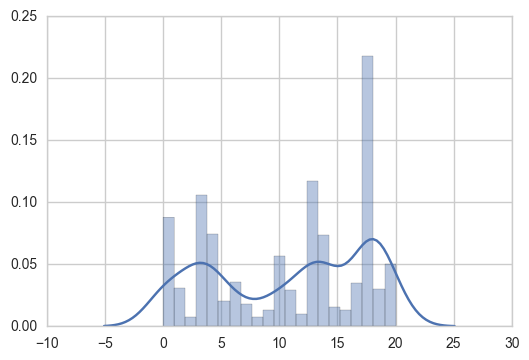

In [79]:
# sns.distplot(x=np.array(u_user_df["occupation"]))
occupation = np.array(u_user_df["occupation"])
occupation_list = np.unique(occupation)
occupation_dict = dict(zip(occupation_list, np.arange(0, len(occupation_list))))
x = [occupation_dict[i] for i in occupation]
sns.distplot(x, bins=len(occupation_list))

In [82]:
import collections
colloccupation

{'administrator': 0,
 'artist': 1,
 'doctor': 2,
 'educator': 3,
 'engineer': 4,
 'entertainment': 5,
 'executive': 6,
 'healthcare': 7,
 'homemaker': 8,
 'lawyer': 9,
 'librarian': 10,
 'marketing': 11,
 'none': 12,
 'other': 13,
 'programmer': 14,
 'retired': 15,
 'salesman': 16,
 'scientist': 17,
 'student': 18,
 'technician': 19,
 'writer': 20}

In [34]:
x, y = make_blobs(n_samples=100,
                                 n_features=2,
                                 centers=2,
                                 cluster_std=0.5,
                                 shuffle=True)
df = DataFrame({"x1": x[:, 0], "x2": x[:, 1], "y": y})

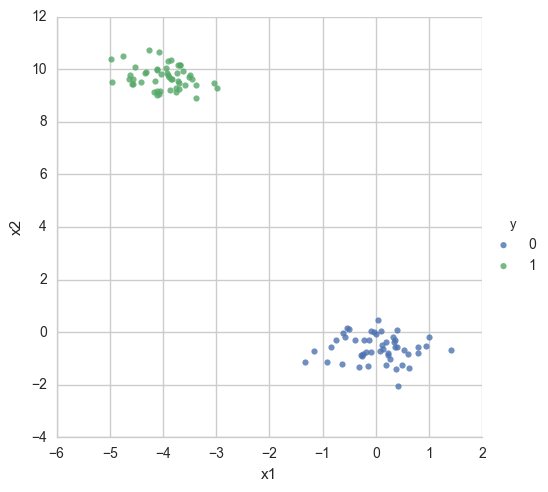

In [37]:
sns.lmplot(x="x1", y="x2", data=df, fit_reg=False, hue="y")

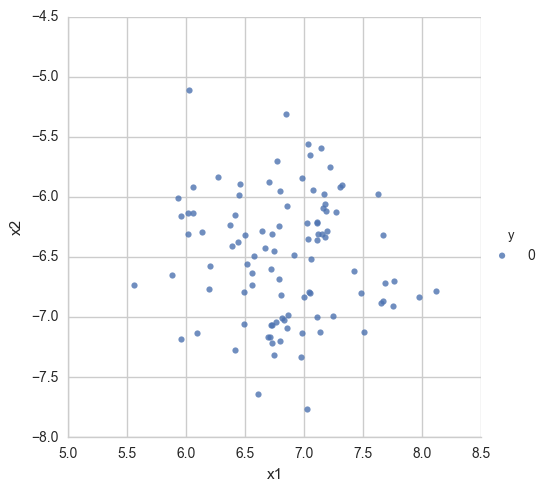

In [44]:
x, y = make_blobs(n_samples=100,
                                 n_features=2,
                                 centers=1,
                                 cluster_std=0.5,
                                 shuffle=True)
df = DataFrame({"x1": x[:, 0], "x2": x[:, 1], "y": y})
sns.lmplot(x="x1", y="x2", data=df, fit_reg=False, hue="y")

In [46]:
np.corrcoef(df.x1, df.x2)

array([[ 1.        , -0.06994293],
       [-0.06994293,  1.        ]])